# LOGISTIC REGRESSION 

### Import libraries

In [1]:
import warnings 
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Import the dataset

In [2]:
df = sns.load_dataset("titanic") # titanic dataset

### Dataset Analysis


In [3]:
print(df.head()) # Check the dataset header
print(df.info()) # Check the dataset info

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-nu

In [4]:
df.drop(["embarked","class","alive"], axis = 1, inplace = True) # Dropping the 'embarked', 'class' and 'alive' columns due to the duplicity of information

### Exploratory Data Analysis

### Checking the number of nulls 

In [5]:
null_num = [] 
for i in df.columns:
    x = df[i].isnull().sum()
    null_num.append(x)

pd.DataFrame(null_num, index=df.columns, columns=["Missing Values"])

df.drop(["deck"], axis = 1, inplace = True) # Dropping the 'deck' column due to the number of missing values

<Axes: xlabel='pclass', ylabel='age'>

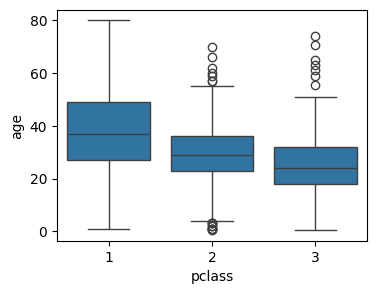

In [6]:
plt.figure(figsize = (4, 3))
sns.boxplot(x = "pclass", y = "age", data = df)

### Filling missing 'age' values according to 'class'


In [7]:
def fillna_age(columns):
    age = columns[0]
    pclass = columns[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 38 # average age of first class
        elif pclass == 2:
            return 29 # average age of second class
        else:
            return 23 # average age of third class
    else:
        return age

df['age'] = df[["age", "pclass"]].apply(fillna_age, axis = 1)

In [8]:
df.dropna(inplace = True) # Dropping the 2 remnant nulls from 'embark_town'

### Data Analysis

### Survivors Count

survived
0    549
1    340
Name: count, dtype: int64

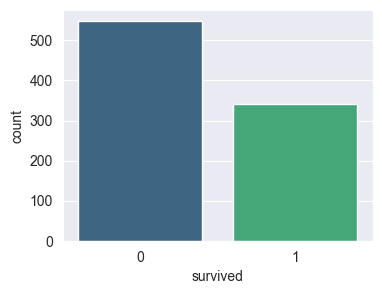

In [9]:
plt.figure(figsize=(4,3))
sns.set_style("darkgrid")
sns.countplot(x = "survived", data = df, palette = "viridis")
df.survived.value_counts()

### Alone Survivors

survived
0    549
1    340
Name: count, dtype: int64

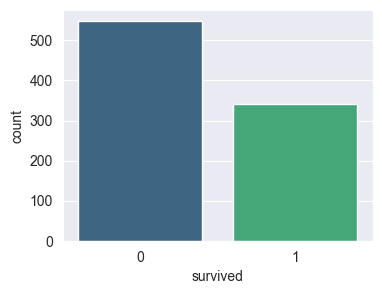

In [10]:
plt.figure(figsize=(4,3))
sns.set_style("darkgrid")
sns.countplot(x = "survived", data = df, palette = "viridis")
df.survived.value_counts()

### Adult Male Survivors

<Axes: xlabel='survived', ylabel='count'>

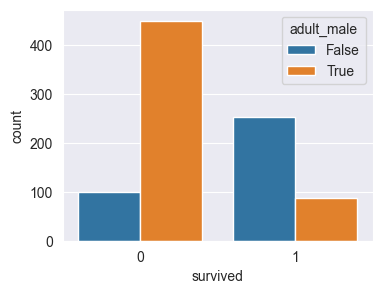

In [11]:
plt.figure(figsize=(4,3))
sns.set_style("darkgrid")
sns.countplot(x = "survived", hue= "adult_male", data = df)

### Male and Female Survivors

<Axes: xlabel='survived', ylabel='count'>

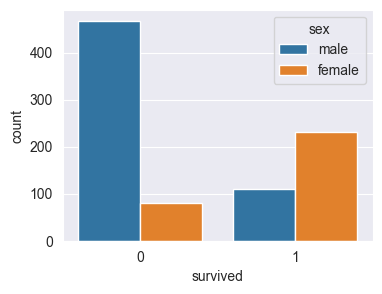

In [12]:
plt.figure(figsize=(4,3))
sns.set_style("darkgrid")
sns.countplot(x = "survived", hue= "sex", data = df)

### Embark Town

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

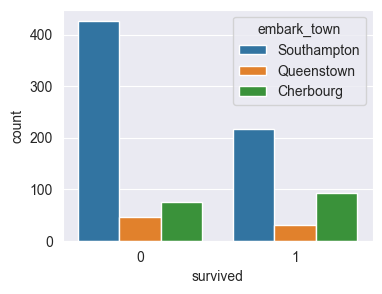

In [13]:
plt.figure(figsize=(4,3))
sns.set_style("darkgrid")
sns.countplot(x = "survived", hue= "embark_town", data = df)
df.embark_town.value_counts()

### Age distribution plot 

<Axes: xlabel='age', ylabel='Density'>

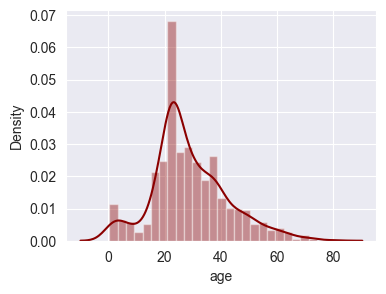

In [14]:
plt.figure(figsize=(4,3))
sns.set_style("darkgrid")
sns.distplot(df["age"], color = "darkred")

### Fare distribution plot 

<Axes: xlabel='fare', ylabel='Density'>

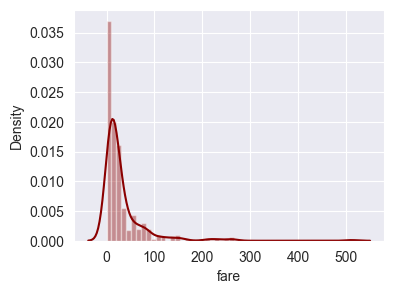

In [15]:
plt.figure(figsize=(4,3))
sns.distplot(df["fare"], color = "darkred")

### Heatmap matrix

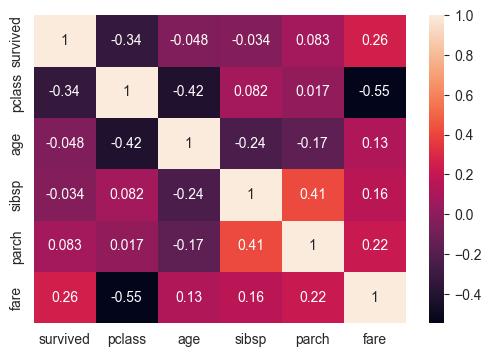

In [16]:
plt.figure(figsize=(6,4))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True)
plt.show()

In [17]:
df.drop(["age", "sibsp", "parch"], axis = 1, inplace = True) # Removing variables due to high correlation

### Creating some dummies and substituting do the dataframe to remove strings


In [18]:
sex = pd.get_dummies(df["sex"], drop_first = True).astype(int) # Convertendo True/False para 1/0
who = pd.get_dummies(df["who"], drop_first = True).astype(int)
adult_male = pd.get_dummies(df["adult_male"], drop_first = True).astype(int)
adult_male.columns = ['adult_male_true'] 
embark_town = pd.get_dummies(df["embark_town"], drop_first = True).astype(int)
alone = pd.get_dummies(df["alone"], drop_first = True).astype(int)
alone.columns = ['alone_true'] 
df = pd.concat([df, sex, who, adult_male, embark_town, alone], axis = 1)
df.drop(["sex", "who", "adult_male", "embark_town", "alone"], axis = 1, inplace = True)

## MODELING

In [19]:
y = df['survived']                       # This is the target
x = df.drop(['survived'], axis = 1)      # 

### Splitting data

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25)

### Instantiate the model

In [21]:
logistic_model = LogisticRegression() # This will instantiate the logistic regression model

### Training the model

In [22]:
logistic_model.fit(X_train,Y_train) 

LogisticRegression()

### Predicting values

In [23]:
Y_pred = logistic_model.predict(X_test)

### Reports

In [24]:
print(classification_report(Y_test, Y_pred))

print("TP, FN \nFP, TN")
print(confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79       135
           1       0.68      0.74      0.71        88

    accuracy                           0.76       223
   macro avg       0.75      0.75      0.75       223
weighted avg       0.76      0.76      0.76       223

TP, FN 
FP, TN
[[104  31]
 [ 23  65]]
